In [ ]:
from fastai import *
from fastai.vision import *


In [3]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 669M/675M [00:06<00:00, 148MB/s]
100% 675M/675M [00:06<00:00, 109MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria -d Dataset

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [2]:
src=(ImageList.from_folder('Dataset/cell_images')
.split_by_rand_pct(0.3)
.label_from_folder())


In [3]:
data=(src.transform(get_transforms(),size=224)
.databunch(bs=128).normalize(imagenet_stats))

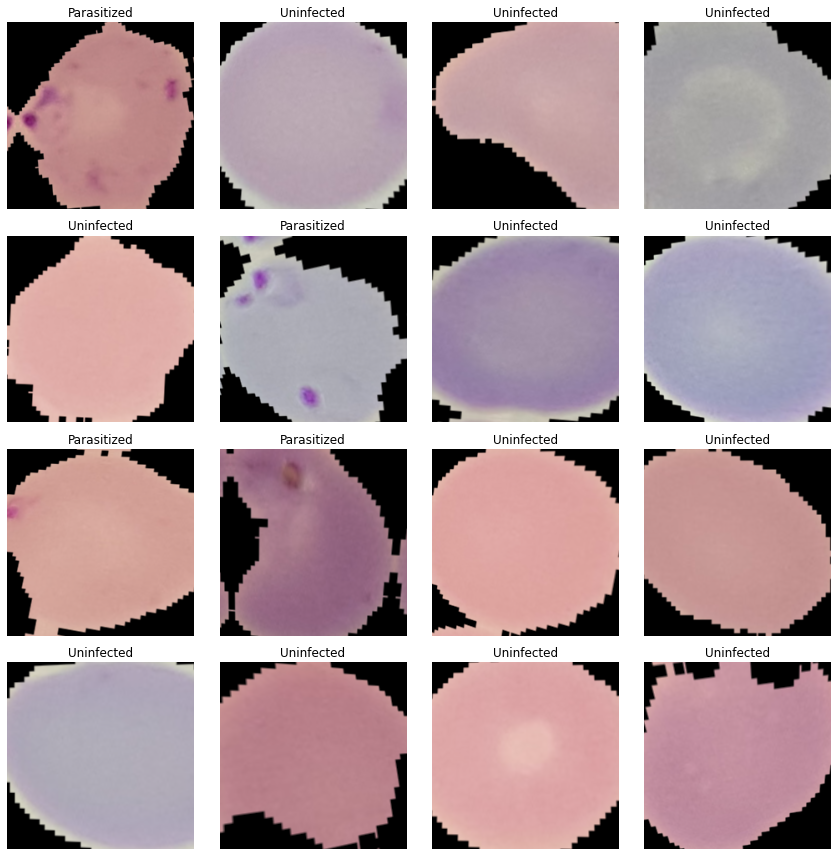

In [5]:
data.show_batch( 4,figsize=(12,12))

In [6]:
len(data.train_ds)

19291

In [7]:
len(data.valid_ds)

8267

In [8]:
data.c

2

In [13]:
learn=cnn_learner(data,models.mobilenet_v2,metrics=[accuracy,error_rate])

In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


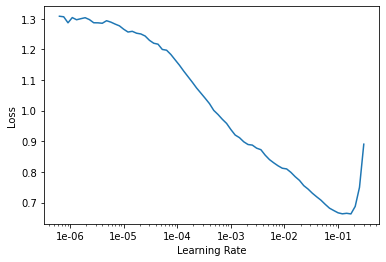

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2,1e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.219692,0.149825,0.953308,0.046692,03:45
1,0.139246,0.104937,0.961292,0.038708,03:42


In [17]:
learn.save('stage-1')

In [18]:
learn.unfreeze()

In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


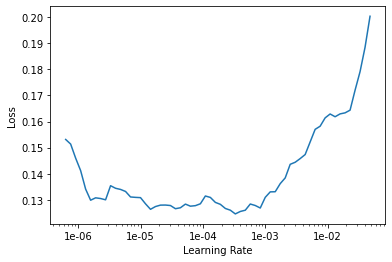

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2,1e-5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.111783,0.100717,0.961534,0.038466,03:57
1,0.111433,0.099611,0.961413,0.038587,03:56


In [22]:
learn.save('stage-2')

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


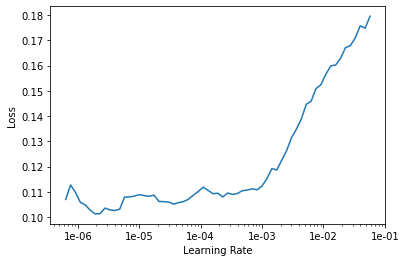

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(2,3e-6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.114438,0.098828,0.961534,0.038466,04:00
1,0.108289,0.098702,0.961534,0.038466,03:58


In [30]:
learn.save('stage-3')

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

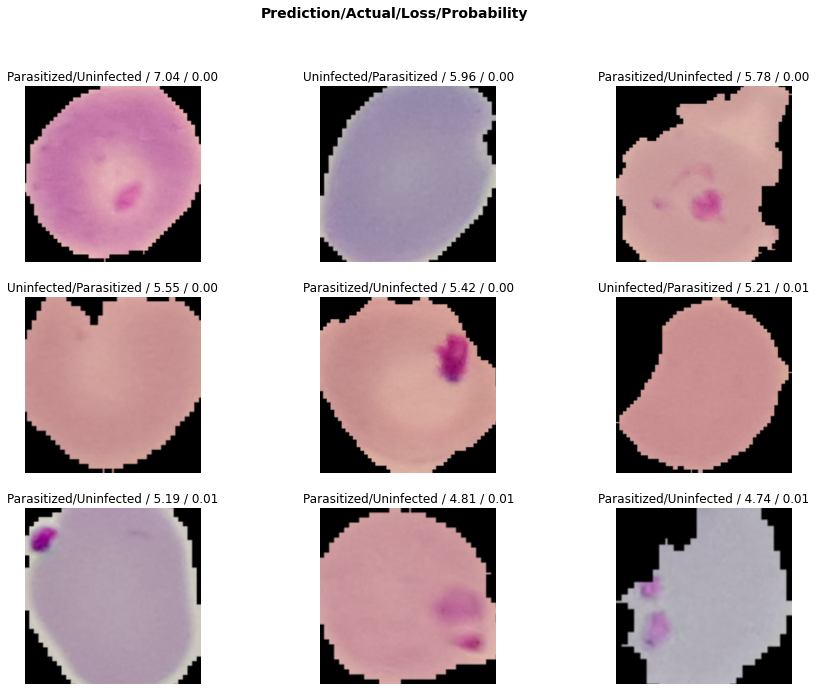

In [32]:
interp.plot_top_losses(9, figsize=(15,11))

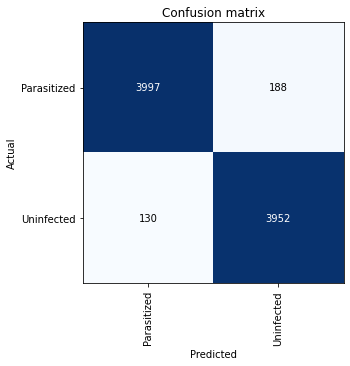

In [33]:
interp.plot_confusion_matrix(figsize=(5,5))

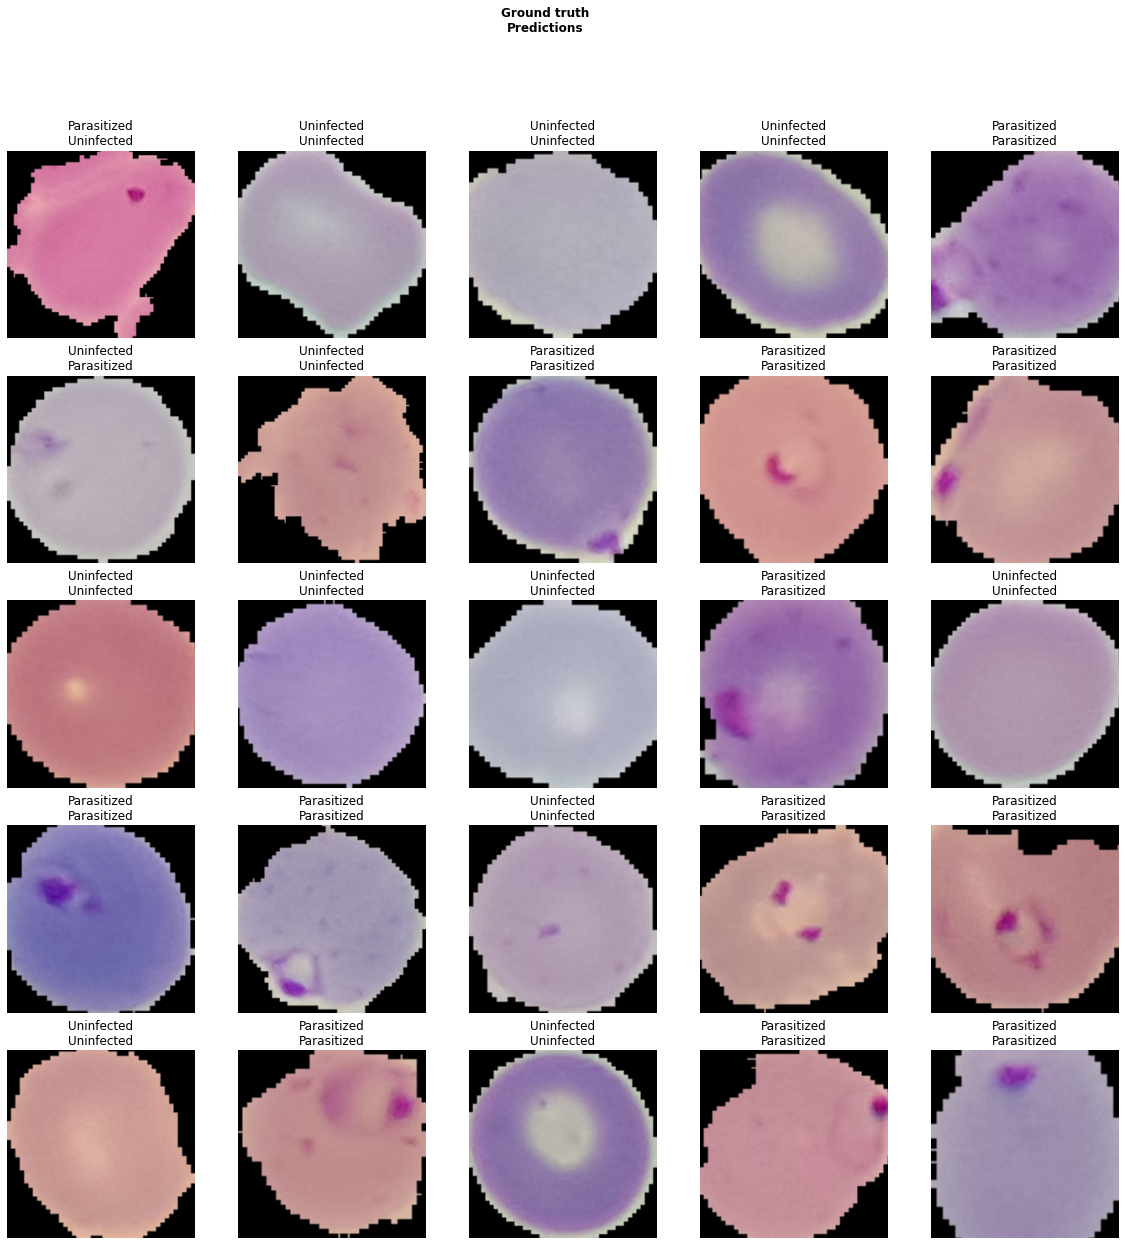

In [34]:
learn.show_results()

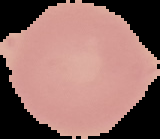

In [35]:
img=open_image('/content/Dataset/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')
img

In [36]:
learn.predict(img)

(Category tensor(1), tensor(1), tensor([0.0015, 0.9985]))

In [37]:
learn.export()